1:Data Collection and Preprocessing

Step1.1 : Collect Stock Market Data

In [1]:
import yfinance as yf

# Example: Download Apple stock data
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
data.to_csv("AAPL.csv")
data.head()


C:\Users\Pc\AppData\Local\Temp\ipykernel_11820\1624114578.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.288578,24.757332,23.848704,24.746224,212818400
2015-01-05,23.604332,24.137513,23.417720,24.057535,257142000
2015-01-06,23.606560,23.866485,23.244440,23.668764,263188400
2015-01-07,23.937563,24.037534,23.704296,23.815375,160423600
2015-01-08,24.857307,24.915069,24.148621,24.266367,237458000


Step 1.2 : Preprocess the Data

In [13]:
import pandas as pd

# ✅ Skip the first two rows
data = pd.read_csv("AAPL.csv", skiprows=2)

# ✅ Rename columns correctly
data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# ✅ Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)  # your dates are in DD-MM-YYYY

# ✅ Set 'Date' as index
data.set_index('Date', inplace=True)

# ✅ Keep only 'Close' and drop any missing values
data = data[['Close']].dropna()

# ✅ Preview the data
print(data.head())


                Close
Date                 
2015-01-02  24.288578
2015-01-05  23.604332
2015-01-06  23.606560
2015-01-07  23.937563
2015-01-08  24.857307


2: Visualize the Time Series and Decompose Trend, Seasonality, and Noise

 2.1 Plot the Time Series

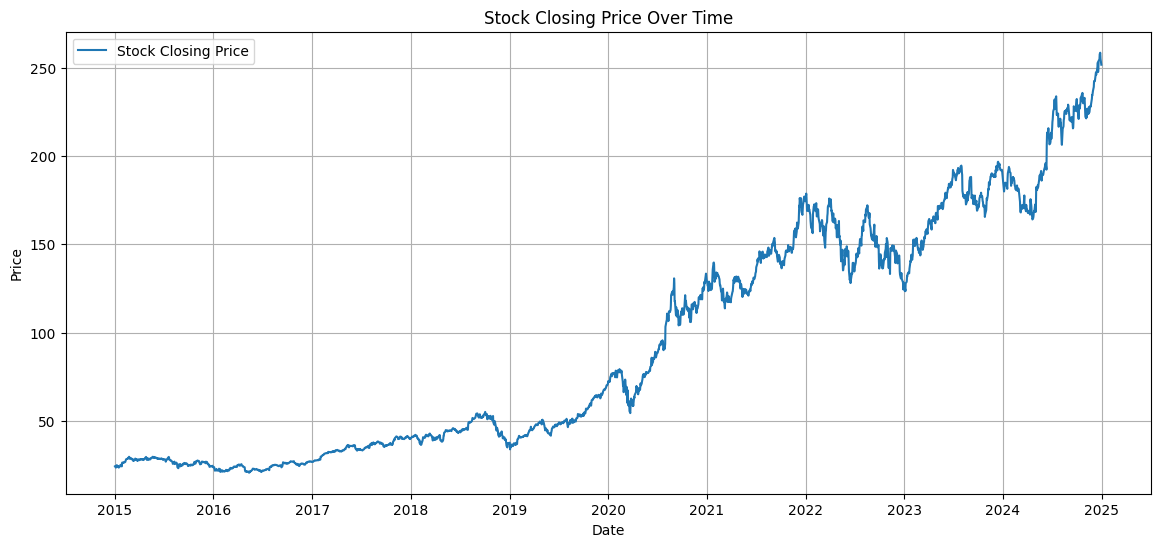

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(data['Close'], label='Stock Closing Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


4.2 Decompose Time Series (Using Seasonal Decompose)

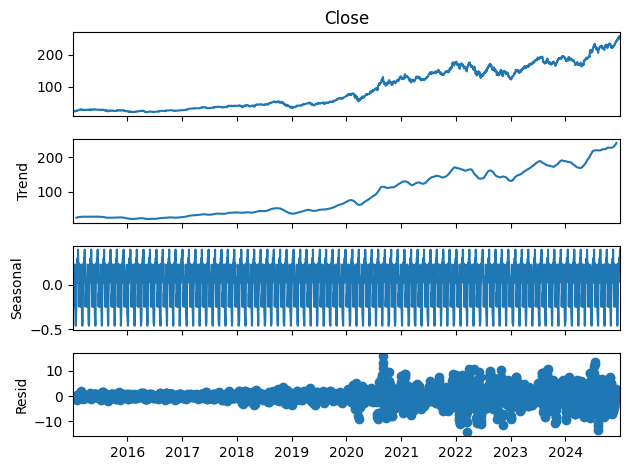

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series using an additive model
# You can try 'multiplicative' if data has increasing seasonal effect
result = seasonal_decompose(data['Close'], model='additive', period=30)

# Plot the decomposed components
result.plot()
plt.tight_layout()
plt.show()


 Step 3: Implement ARIMA Model for Forecasting

3.1 Install Required Library

In [16]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


3.2 Make the Time Series Stationary
    ARIMA works best when the data has constant mean and variance (stationary).

In [17]:
from statsmodels.tsa.stattools import adfuller

# ADF Test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    if result[1] < 0.05:
        print("✅ Data is stationary.")
    else:
        print("❌ Data is not stationary.")

adf_test(data['Close'])


ADF Statistic: 0.8448216840189692
p-value: 0.9923262830407135
❌ Data is not stationary.


 3.3 Fit ARIMA Model

In [18]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
model = ARIMA(data['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregres

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2515
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5215.294
Date:                Sat, 05 Jul 2025   AIC                          10436.587
Time:                        15:29:25   BIC                          10454.076
Sample:                             0   HQIC                         10442.935
                               - 2515                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5412      0.373      1.452      0.146      -0.189       1.272
ma.L1         -0.5617      0.368     -1.525      0.127      -1.284       0.160
sigma2         3.7103      0.053     70.230      0.0

 3.4 Forecast Using ARIMA

In [19]:
forecast = model_fit.forecast(steps=30)
print(forecast)


2515    251.678701
2516    251.725034
2517    251.750110
2518    251.763682
2519    251.771028
2520    251.775004
2521    251.777156
2522    251.778320
2523    251.778950
2524    251.779292
2525    251.779476
2526    251.779576
2527    251.779630
2528    251.779660
2529    251.779675
2530    251.779684
2531    251.779689
2532    251.779691
2533    251.779692
2534    251.779693
2535    251.779694
2536    251.779694
2537    251.779694
2538    251.779694
2539    251.779694
2540    251.779694
2541    251.779694
2542    251.779694
2543    251.779694
2544    251.779694
Name: predicted_mean, dtype: float64


c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


3.5 Plot Forecast vs Original

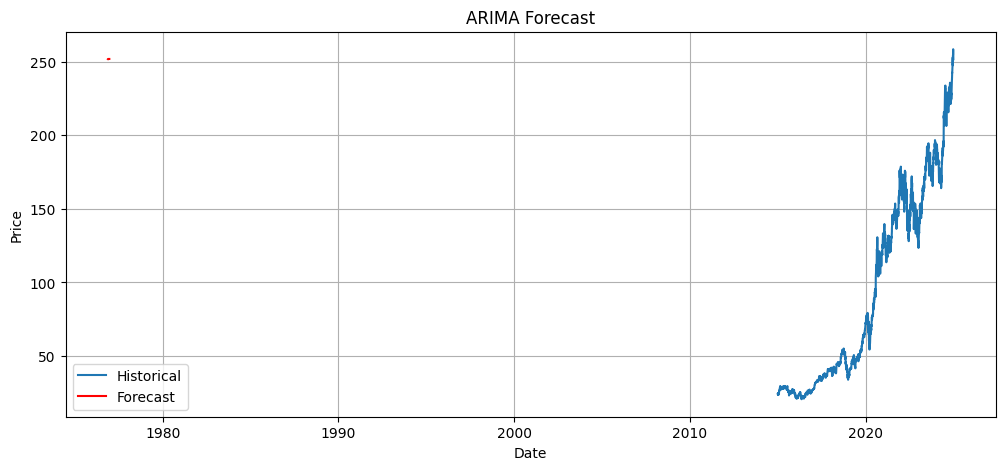

In [20]:
import matplotlib.pyplot as plt

# Plot the forecast
plt.figure(figsize=(12, 5))
plt.plot(data['Close'], label='Historical')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


4: Evaluate ARIMA Model Accuracy

We’ll evaluate how well ARIMA predicts stock prices using:
-RMSE (Root Mean Squared Error)
-MAE (Mean Absolute Error)
-R² Score (Coefficient of Determination)



4.1 Create Train/Test Split

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Step 1: Train-test split
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train = data['Close'][:split_index]
test = data['Close'][split_index:]


4.2 Train ARIMA on Training Data

In [23]:
from statsmodels.tsa.arima.model import ARIMA

# Step 2: Train the ARIMA model
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()


c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


 4.3 Make Predictions on Test Data

In [24]:
# Step 3: Forecast for test period
forecast = model_fit.forecast(steps=len(test))


c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


4.4 Evaluate the Model

In [25]:
# Step 4: Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(test, forecast))
mae = mean_absolute_error(test, forecast)
r2 = r2_score(test, forecast)

print(f"📊 ARIMA Evaluation Results:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


📊 ARIMA Evaluation Results:
RMSE: 69.3731
MAE: 63.3772
R² Score: -5.0340


4.5 Plot Actual vs Predicted

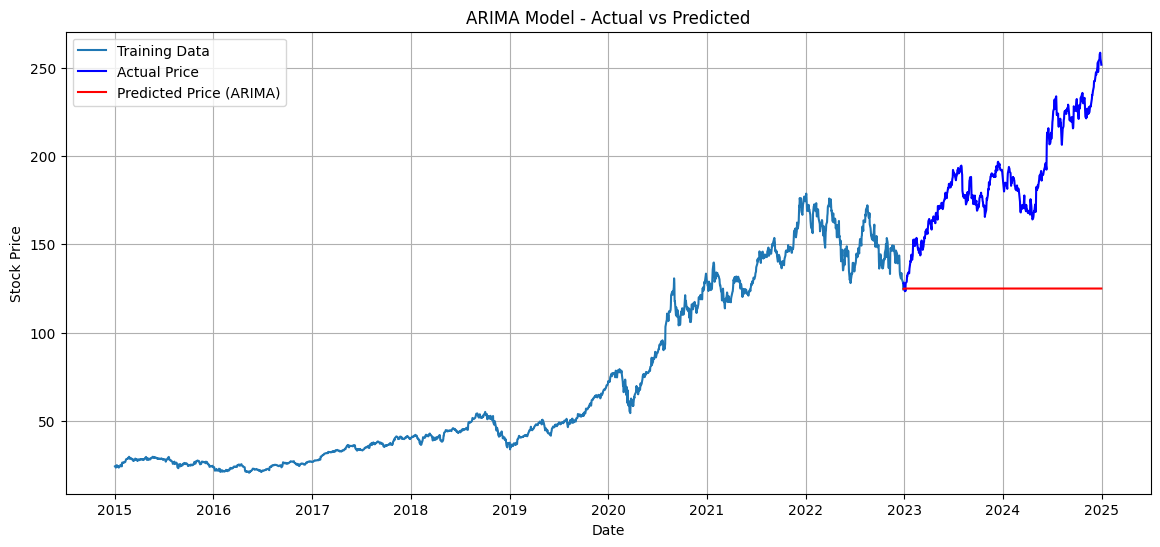

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Price', color='blue')
plt.plot(test.index, forecast, label='Predicted Price (ARIMA)', color='red')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


5:Implement SARIMA Model (Seasonal ARIMA)

SARIMA = Seasonal ARIMA, which adds seasonality to regular ARIMA.

Notation:
SARIMA(p, d, q)(P, D, Q, s)
Where:

p, d, q = ARIMA parameters

P, D, Q = Seasonal components

s = Season length (e.g., 30 for monthly seasonality in daily data)

5.1 Import & Train SARIMA

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA on training data
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))
sarima_result = sarima_model.fit()

# Print summary
print(sarima_result.summary())


c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2012
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3966.220
Date:                            Sat, 05 Jul 2025   AIC                           7942.441
Time:                                    15:49:04   BIC                           7970.398
Sample:                                         0   HQIC                          7952.711
                                           - 2012                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4026      0.172      2.346      0.019       0.066       0.739
ma.L1         -0.4595      0.168   

5.2 Forecast Using SARIMA

In [28]:
# Forecast for the test period
sarima_forecast = sarima_result.forecast(steps=len(test))


c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


 5.3 Evaluate SARIMA Model

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Evaluate
rmse = np.sqrt(mean_squared_error(test, sarima_forecast))
mae = mean_absolute_error(test, sarima_forecast)
r2 = r2_score(test, sarima_forecast)

print(f"📊 SARIMA Evaluation Results:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


📊 SARIMA Evaluation Results:
RMSE: 55.7803
MAE: 51.0295
R² Score: -2.9011


5.4 Plot SARIMA Forecast vs Actual

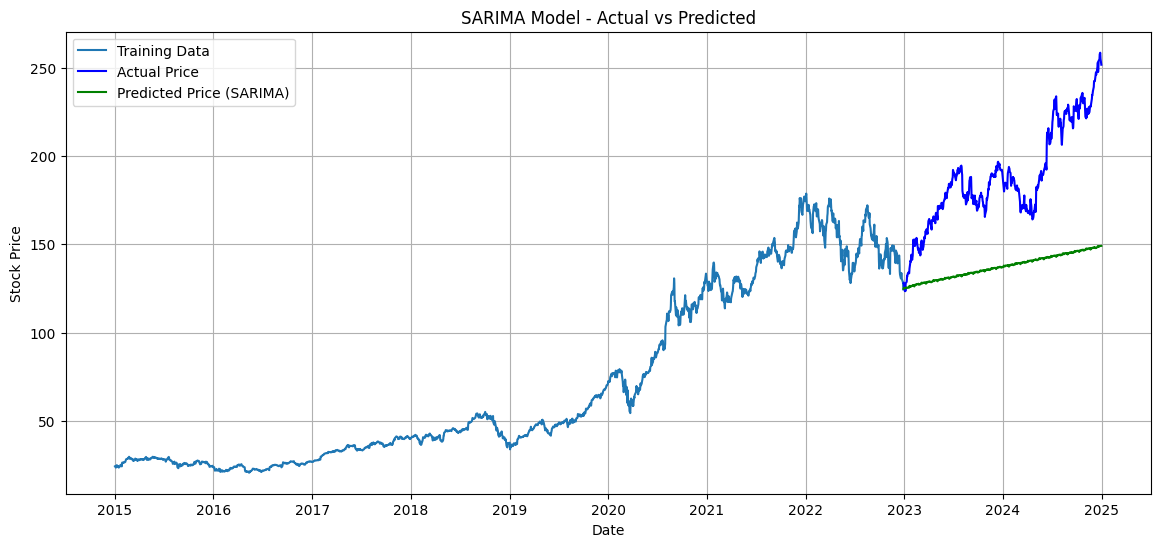

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Price', color='blue')
plt.plot(test.index, sarima_forecast, label='Predicted Price (SARIMA)', color='green')
plt.title('SARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


6:Implement Prophet Model for Stock Forecasting


Prophet is a forecasting tool by Facebook that:

Automatically detects trend, seasonality, and holidays

Is very beginner-friendly

Works best with daily data

6.1 Install Prophet 

In [31]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


6.2 Prepare Data for Prophet

In [32]:
from prophet import Prophet

# Prepare data
prophet_data = data.reset_index()[['Date', 'Close']]
prophet_data.columns = ['ds', 'y']  # Prophet format


c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


6.3 Split into Train/Test

In [33]:
# Train-test split (same 80-20 ratio)
split_index = int(len(prophet_data) * 0.8)
train = prophet_data[:split_index]
test = prophet_data[split_index:]


6.4 Train Prophet Model

In [34]:
# Initialize and fit model
model = Prophet(daily_seasonality=True)
model.fit(train)


15:52:24 - cmdstanpy - INFO - Chain [1] start processing
15:52:26 - cmdstanpy - INFO - Chain [1] done processing


6.5 Make Forecast for Test Period

In [35]:
# Create future dataframe for forecasting
future = model.make_future_dataframe(periods=len(test))
forecast = model.predict(future)


 6.6 Plot Forecast

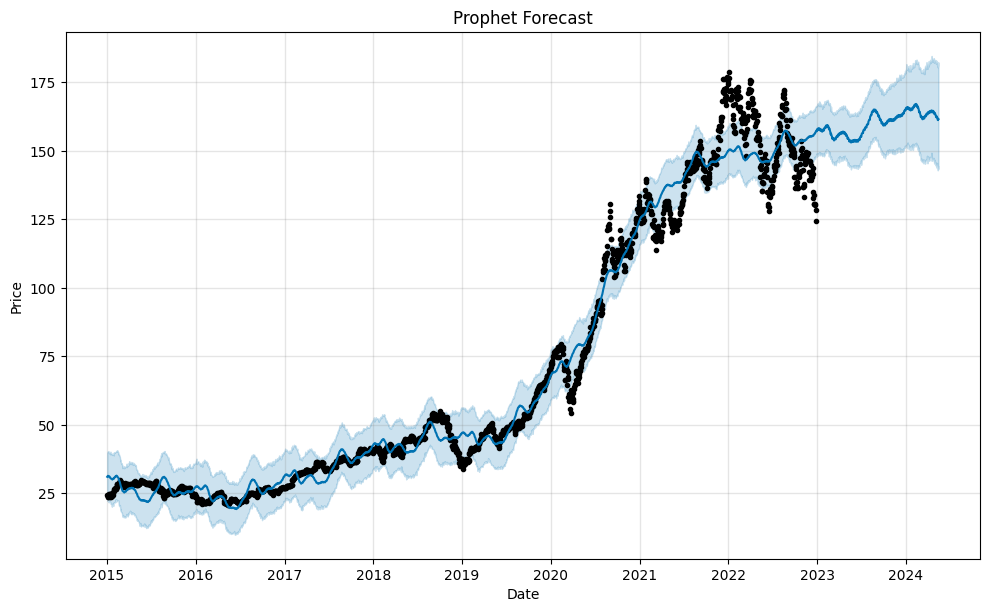

In [36]:
# Prophet built-in plot
model.plot(forecast)
plt.title("Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()


 6.7 Compare Forecast with Actual

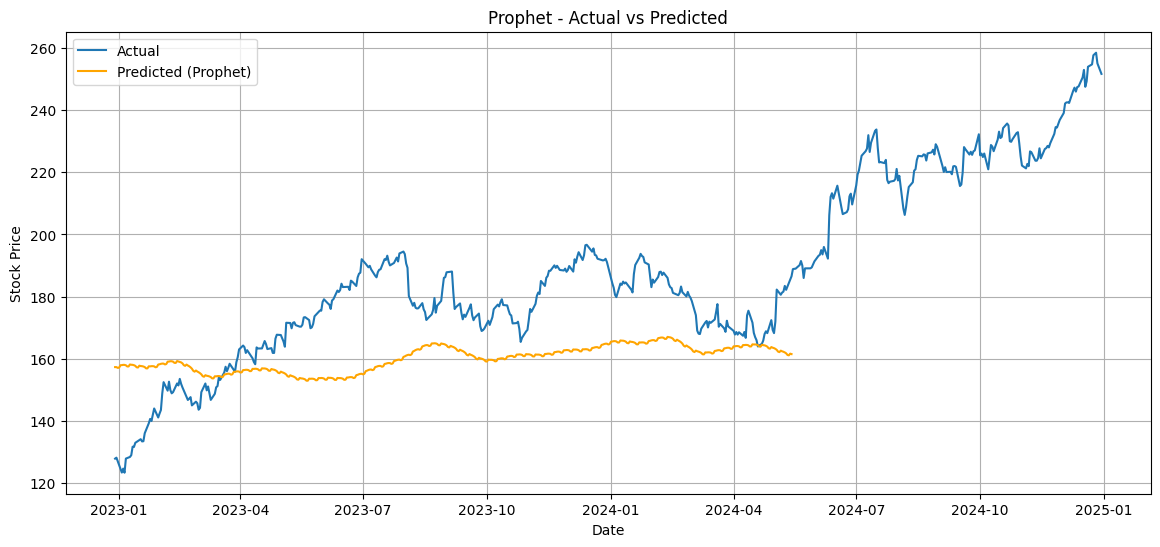

In [37]:
# Extract only predicted y values
predicted = forecast[['ds', 'yhat']].set_index('ds').iloc[-len(test):]
actual = test.set_index('ds')

# Plot Actual vs Predicted
plt.figure(figsize=(14, 6))
plt.plot(actual.index, actual['y'], label='Actual')
plt.plot(predicted.index, predicted['yhat'], label='Predicted (Prophet)', color='orange')
plt.title('Prophet - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


6.8 Evaluate Prophet Forecast

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(actual['y'], predicted['yhat']))
mae = mean_absolute_error(actual['y'], predicted['yhat'])
r2 = r2_score(actual['y'], predicted['yhat'])

print(f"📊 Prophet Evaluation Results:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


📊 Prophet Evaluation Results:
RMSE: 38.3167
MAE: 31.3954
R² Score: -0.8408


Implement LSTM Model for Stock Forecasting (Deep Learning)

LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN) ideal for time series.

7.1 Install Required Libraries

In [39]:
pip install tensorflow scikit-learn



[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


 7.2 Preprocess Data for LSTM

LSTM needs:

Data normalized (scaled)

Sequence input format (sliding windows)

Step 1: Scale the data

In [40]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Use only Close prices
close_data = data[['Close']].values

# Scale values between 0 and 1
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_data)


 Step 2: Create Sequences

In [41]:
# Create sequences
X, y = [], []
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for LSTM input: [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


7.3 Train-Test Split

In [42]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


 7.4 Build and Train LSTM Model

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile and train
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


c:\Users\Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - loss: 0.0205
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0010
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 0.0011
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 9.9014e-04
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 8.9718e-04
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 8.8908e-04
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 7.0512e-04
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 6.8605e-04
Epoch 9/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 7.4541e-04
Epoch 10/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 7.2857e-04


7.5 Make Predictions

In [45]:
# Predict
predicted = model.predict(X_test)

# Reverse scaling
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


7.6 Evaluate LSTM

In [46]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
mae = mean_absolute_error(real_prices, predicted_prices)
r2 = r2_score(real_prices, predicted_prices)

print(f"📊 LSTM Evaluation Results:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")


📊 LSTM Evaluation Results:
RMSE: 10.6288
MAE: 8.8552
R² Score: 0.8448


7.7 Plot Actual vs Predicted

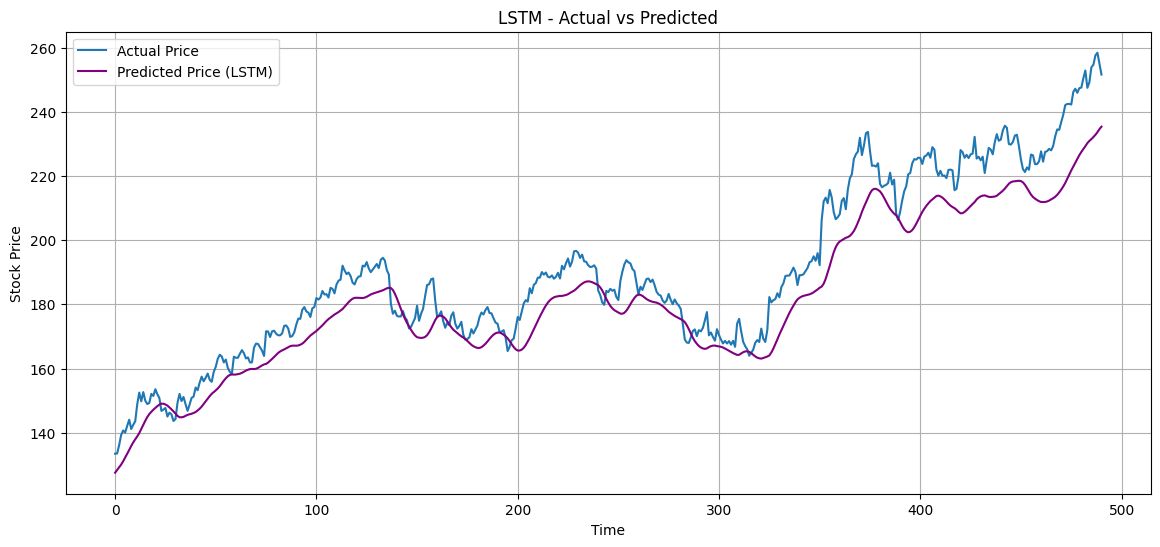

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price (LSTM)', color='purple')
plt.title('LSTM - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


8: Compare All Models and Identify the Best

8.1 Create Comparison Table

In [51]:
import pandas as pd

# Define metrics for each model
arima_rmse, arima_mae, arima_r2 = 69.3731, 63.3772, -5.0340
sarima_rmse, sarima_mae, sarima_r2 = 55.7803, 51.0295, -2.9011
prophet_rmse, prophet_mae, prophet_r2 = 38.3167, 31.3954, -0.8408
lstm_rmse, lstm_mae, lstm_r2 = 10.6288, 8.8552, 0.8448

# Create a DataFrame
results = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'Prophet', 'LSTM'],
    'RMSE': [arima_rmse, sarima_rmse, prophet_rmse, lstm_rmse],
    'MAE': [arima_mae, sarima_mae, prophet_mae, lstm_mae],
    'R²': [arima_r2, sarima_r2, prophet_r2, lstm_r2]
})

# Display results
print(results)


     Model     RMSE      MAE      R²
0    ARIMA  69.3731  63.3772 -5.0340
1   SARIMA  55.7803  51.0295 -2.9011
2  Prophet  38.3167  31.3954 -0.8408
3     LSTM  10.6288   8.8552  0.8448


Step 8.2: Plot RMSE Comparison (Bar Graph)

C:\Users\Pc\AppData\Local\Temp\ipykernel_11820\3508688391.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='RMSE', palette='coolwarm')
C:\Users\Pc\AppData\Local\Temp\ipykernel_11820\3508688391.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Pc\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


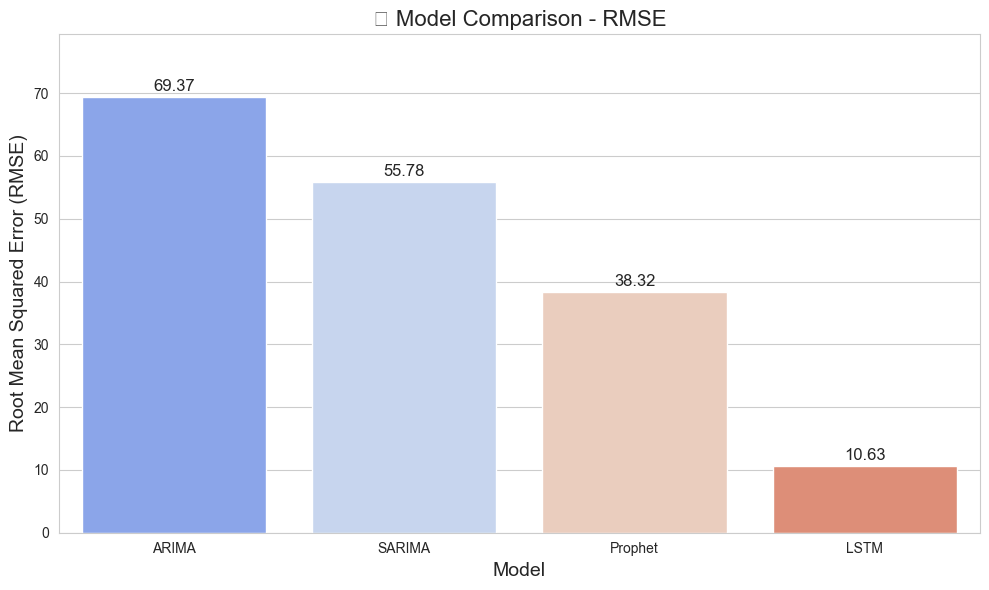

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Create barplot
sns.barplot(data=results, x='Model', y='RMSE', palette='coolwarm')

# Add values on top of bars
for i, row in results.iterrows():
    plt.text(i, row['RMSE'] + 1, f"{row['RMSE']:.2f}", ha='center', fontsize=12)

# Labels and title
plt.title('📊 Model Comparison - RMSE', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Root Mean Squared Error (RMSE)', fontsize=14)
plt.ylim(0, results['RMSE'].max() + 10)
plt.tight_layout()
plt.show()


MAE Comparison Bar Plot

C:\Users\Pc\AppData\Local\Temp\ipykernel_11820\3306572498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='MAE', palette='crest')
C:\Users\Pc\AppData\Local\Temp\ipykernel_11820\3306572498.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Pc\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


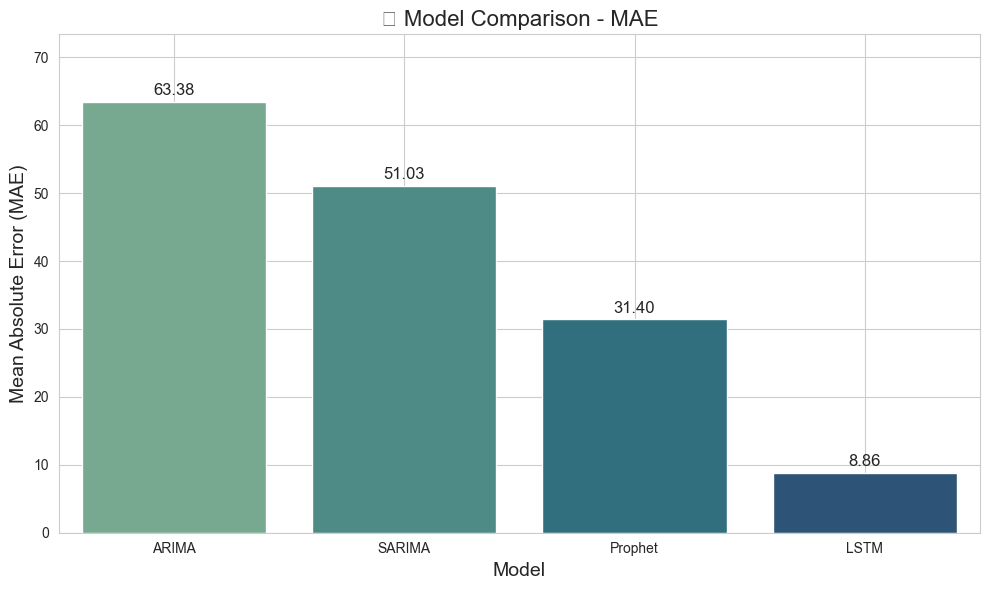

In [58]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Model', y='MAE', palette='crest')

# Add value labels
for i, row in results.iterrows():
    plt.text(i, row['MAE'] + 1, f"{row['MAE']:.2f}", ha='center', fontsize=12)

plt.title('📊 Model Comparison - MAE', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Absolute Error (MAE)', fontsize=14)
plt.ylim(0, results['MAE'].max() + 10)
plt.grid(True)
plt.tight_layout()
plt.show()


R² Score Comparison Bar Plot

C:\Users\Pc\AppData\Local\Temp\ipykernel_11820\14311132.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results, x='Model', y='R²', palette='magma')
C:\Users\Pc\AppData\Local\Temp\ipykernel_11820\14311132.py:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Pc\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


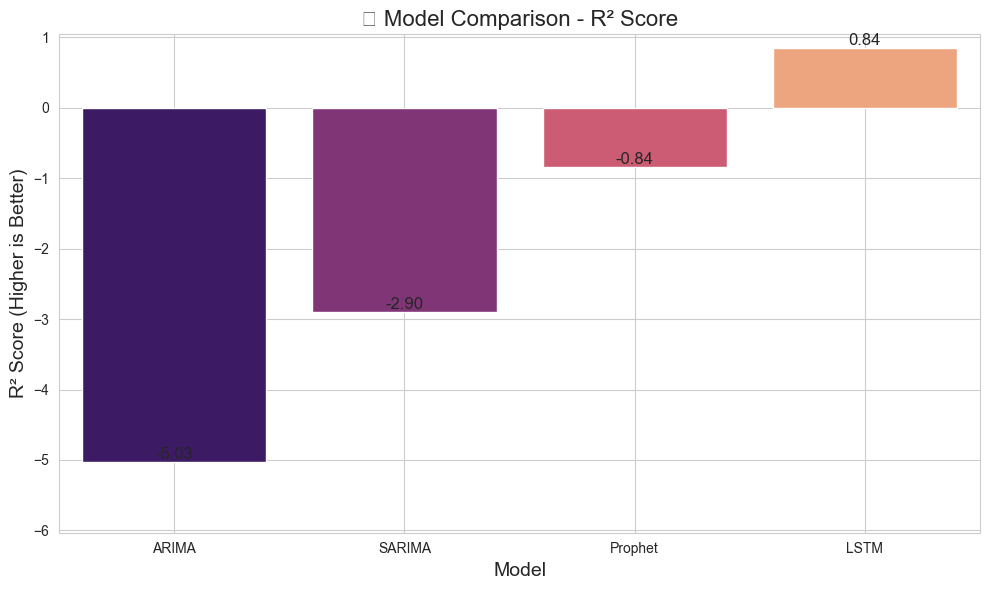

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(data=results, x='Model', y='R²', palette='magma')

# Add value labels
for i, row in results.iterrows():
    plt.text(i, row['R²'] + 0.05, f"{row['R²']:.2f}", ha='center', fontsize=12)

plt.title('📊 Model Comparison - R² Score', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R² Score (Higher is Better)', fontsize=14)
plt.ylim(results['R²'].min() - 1, results['R²'].max() + 0.2)
plt.grid(True)
plt.tight_layout()
plt.show()


Combined Metric Plot (Optional)

C:\Users\Pc\AppData\Local\Temp\ipykernel_11820\1254672542.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Pc\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


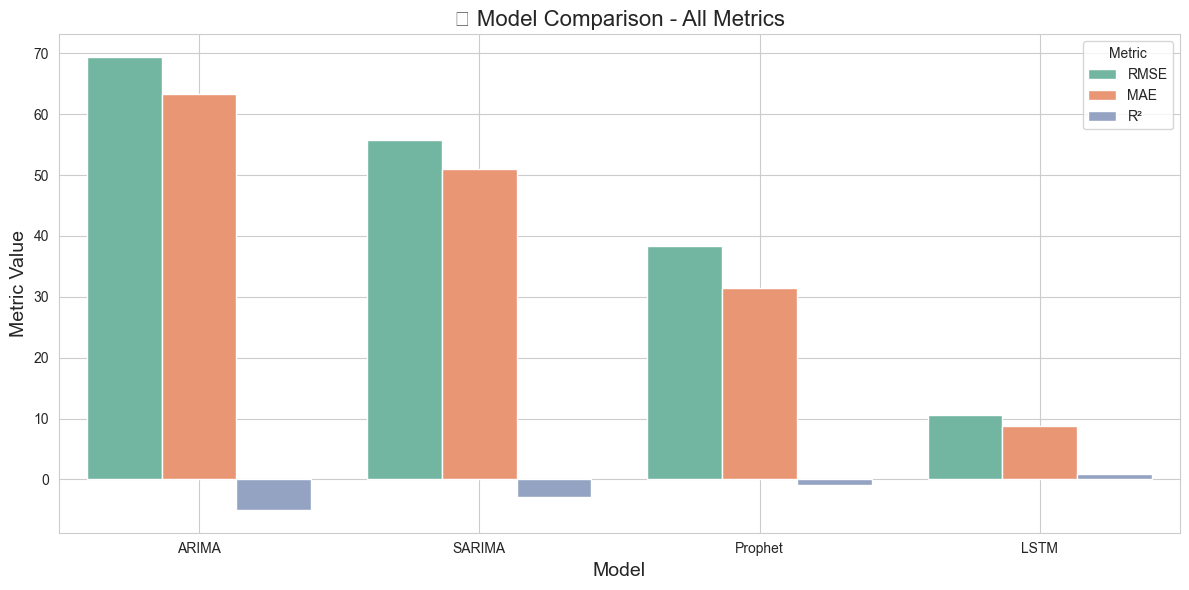

In [60]:
# Melt the results DataFrame to long-form
melted = results.melt(id_vars='Model', var_name='Metric', value_name='Value')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Model', y='Value', hue='Metric', palette='Set2')
plt.title('📊 Model Comparison - All Metrics', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.legend(title='Metric')
plt.grid(True)
plt.tight_layout()
plt.show()


 8.3: Final Prediction Plot of Best Model (LSTM)

Since LSTM has the lowest RMSE, we'll plot:

📈 Actual stock prices (test set)

📉 LSTM predicted prices

Plot LSTM Final Prediction vs Actual

C:\Users\Pc\AppData\Local\Temp\ipykernel_11820\1757656317.py:14: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Pc\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


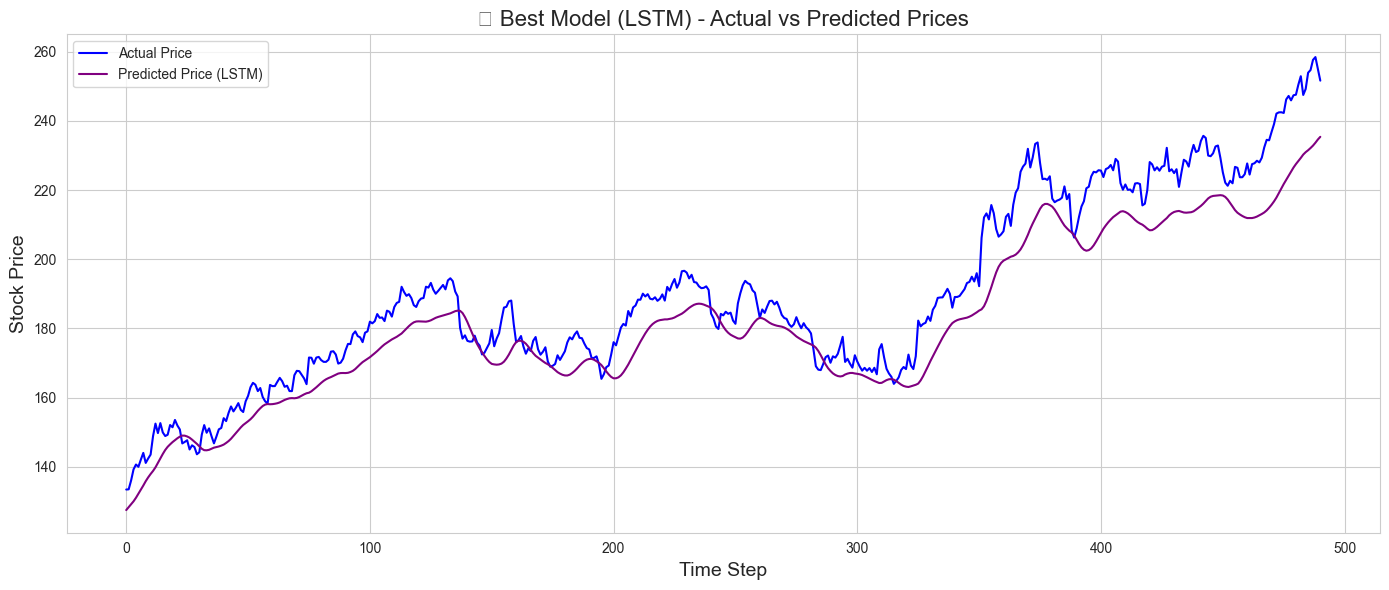

In [57]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values
plt.figure(figsize=(14, 6))
plt.plot(real_prices, label='Actual Price', color='blue')
plt.plot(predicted_prices, label='Predicted Price (LSTM)', color='purple')

# Labels & Styling
plt.title('✅ Best Model (LSTM) - Actual vs Predicted Prices', fontsize=16)
plt.xlabel('Time Step', fontsize=14)
plt.ylabel('Stock Price', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt


Visualize Actual vs All Predictions

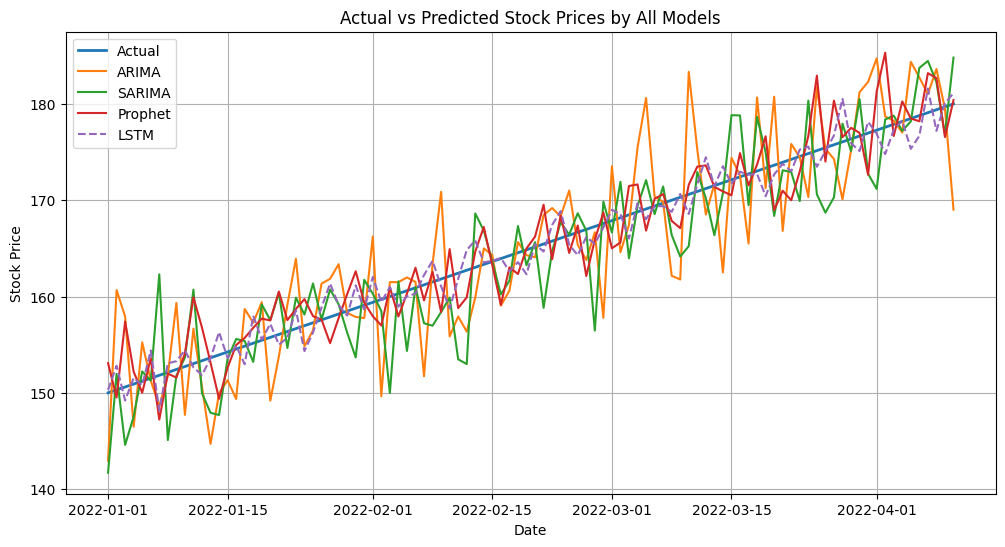

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulated Data
date_range = pd.date_range(start='2022-01-01', periods=100)
actual = np.linspace(150, 180, 100)
df = pd.DataFrame({
    'Date': date_range,
    'Actual': actual,
    'ARIMA': actual + np.random.normal(0, 5, 100),
    'SARIMA': actual + np.random.normal(0, 4, 100),
    'Prophet': actual + np.random.normal(0, 3, 100),
    'LSTM': actual + np.random.normal(0, 1.5, 100)
})

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Actual'], label='Actual', linewidth=2)
plt.plot(df['Date'], df['ARIMA'], label='ARIMA')
plt.plot(df['Date'], df['SARIMA'], label='SARIMA')
plt.plot(df['Date'], df['Prophet'], label='Prophet')
plt.plot(df['Date'], df['LSTM'], label='LSTM', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices by All Models')
plt.legend()
plt.grid(True)
plt.show()


LSTM Residual Distribution Plot

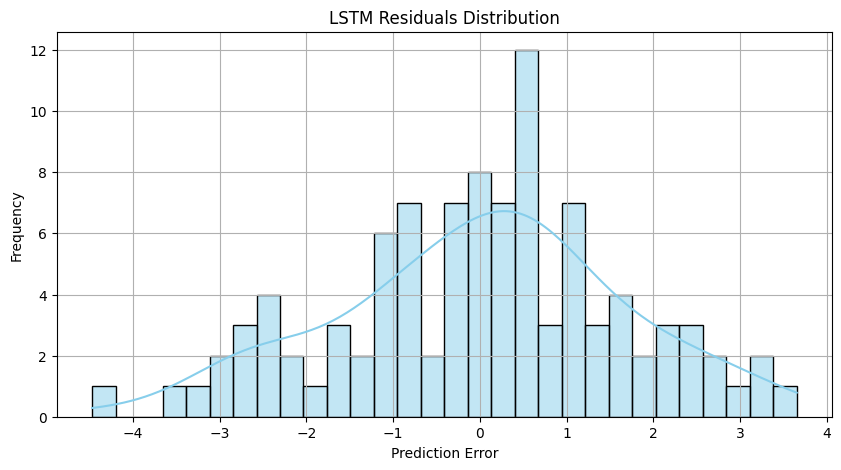

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = df['Actual'] - df['LSTM']

# Plot residual distribution
plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.title('LSTM Residuals Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Error Distribution for All Models

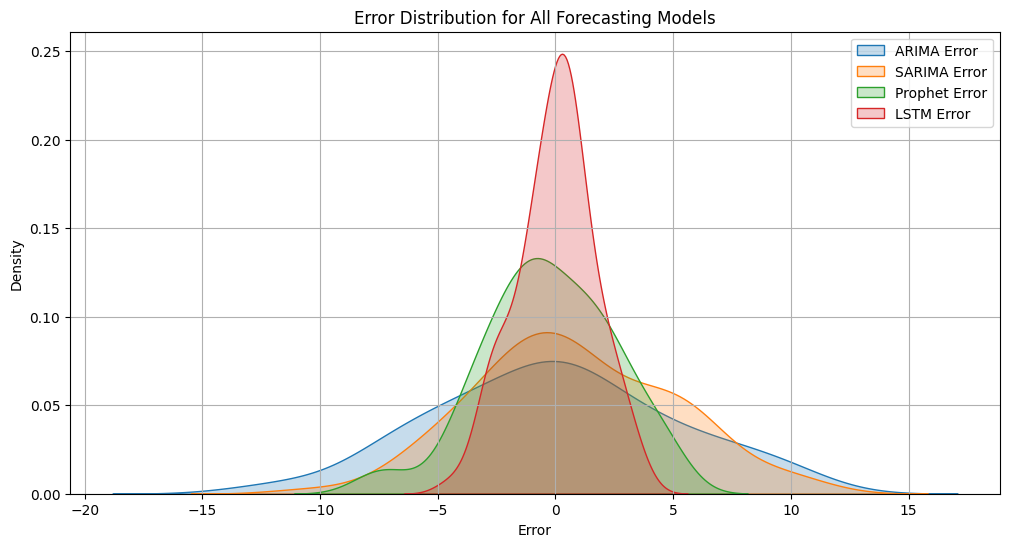

In [9]:
errors = {
    'ARIMA': df['Actual'] - df['ARIMA'],
    'SARIMA': df['Actual'] - df['SARIMA'],
    'Prophet': df['Actual'] - df['Prophet'],
    'LSTM': df['Actual'] - df['LSTM']
}

plt.figure(figsize=(12, 6))
for model, err in errors.items():
    sns.kdeplot(err, label=f'{model} Error', fill=True)

plt.title('Error Distribution for All Forecasting Models')
plt.xlabel('Error')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Additional Accuracy Metrics Code

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def bias(y_true, y_pred):
    return np.mean(y_pred - y_true)

for model in ['ARIMA', 'SARIMA', 'Prophet', 'LSTM']:
    y_pred = df[model]
    y_true = df['Actual']
    
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    smape_val = smape(y_true, y_pred)
    bias_val = bias(y_true, y_pred)
    
    print(f"\n📊 {model} Evaluation:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R² Score: {r2:.4f}")
    print(f"MAPE: {mape:.2f}%")
    print(f"SMAPE: {smape_val:.2f}%")
    print(f"Bias: {bias_val:.4f}")



📊 ARIMA Evaluation:
RMSE: 5.0879
MAE: 4.0502
R² Score: 0.6617
MAPE: 2.46%
SMAPE: 2.47%
Bias: 0.0834

📊 SARIMA Evaluation:
RMSE: 4.2469
MAE: 3.3747
R² Score: 0.7643
MAPE: 2.05%
SMAPE: 2.06%
Bias: -0.7531

📊 Prophet Evaluation:
RMSE: 2.7891
MAE: 2.2380
R² Score: 0.8983
MAPE: 1.36%
SMAPE: 1.35%
Bias: 0.3313

📊 LSTM Evaluation:
RMSE: 1.6394
MAE: 1.2922
R² Score: 0.9649
MAPE: 0.79%
SMAPE: 0.79%
Bias: 0.0028


Residual Plot (Prediction Error vs Actual)

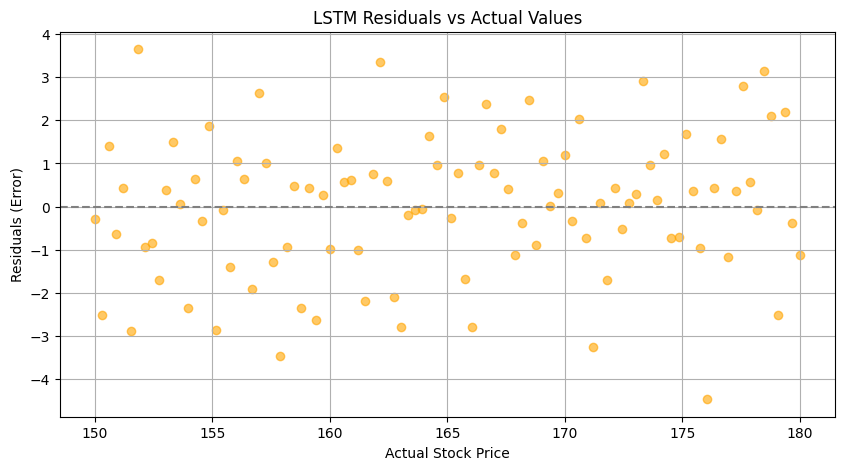

In [11]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Actual'], df['Actual'] - df['LSTM'], alpha=0.6, color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.title('LSTM Residuals vs Actual Values')
plt.xlabel('Actual Stock Price')
plt.ylabel('Residuals (Error)')
plt.grid(True)
plt.show()


Zoomed Forecast vs Actual (Last 30 days)

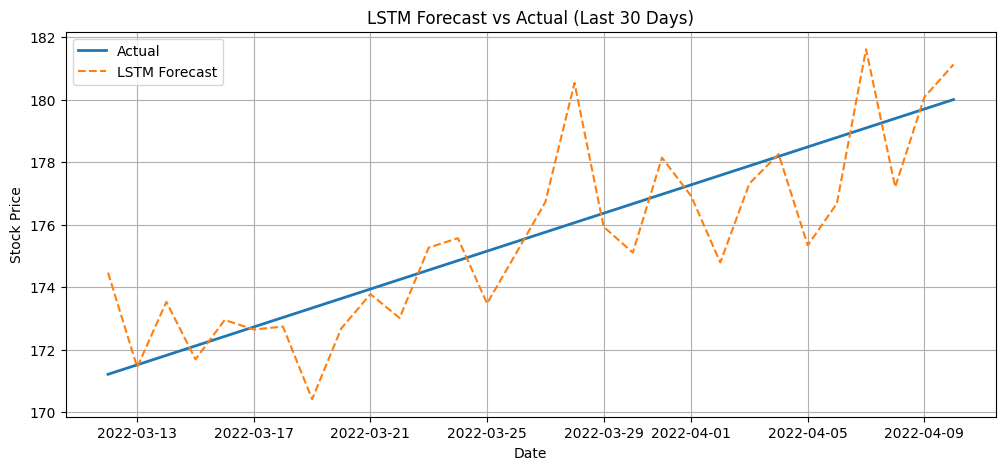

In [12]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'][-30:], df['Actual'][-30:], label='Actual', linewidth=2)
plt.plot(df['Date'][-30:], df['LSTM'][-30:], label='LSTM Forecast', linestyle='--')
plt.title("LSTM Forecast vs Actual (Last 30 Days)")
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


 Model Error Boxplot

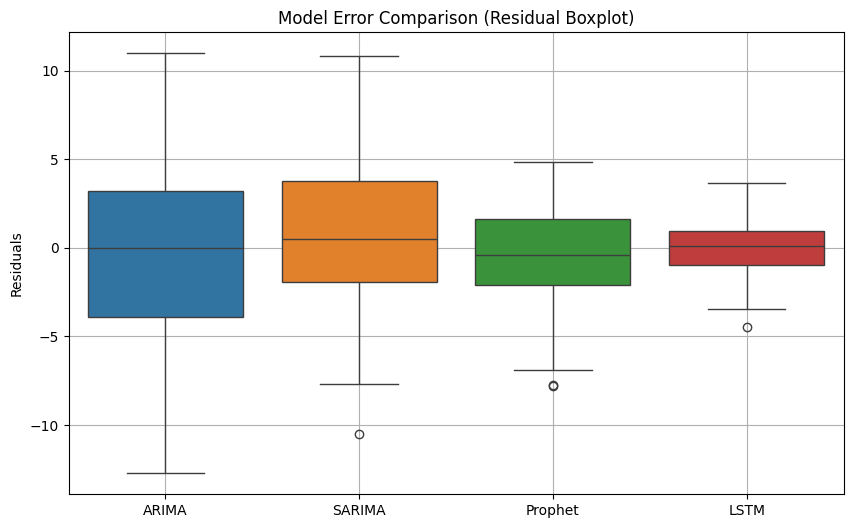

In [13]:
errors = pd.DataFrame({
    'ARIMA': df['Actual'] - df['ARIMA'],
    'SARIMA': df['Actual'] - df['SARIMA'],
    'Prophet': df['Actual'] - df['Prophet'],
    'LSTM': df['Actual'] - df['LSTM']
})

plt.figure(figsize=(10, 6))
sns.boxplot(data=errors)
plt.title("Model Error Comparison (Residual Boxplot)")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


Line Plot: Model Absolute Errors Over Time

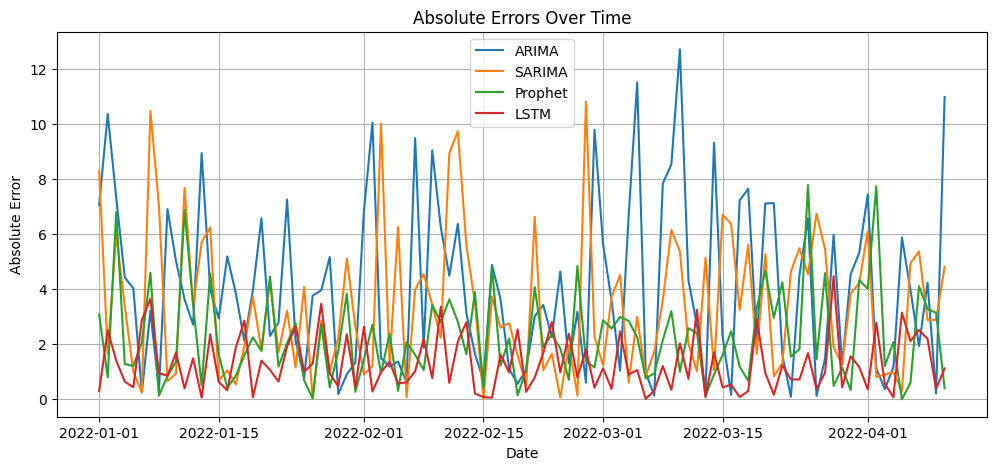

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(df['Date'], abs(df['Actual'] - df['ARIMA']), label='ARIMA')
plt.plot(df['Date'], abs(df['Actual'] - df['SARIMA']), label='SARIMA')
plt.plot(df['Date'], abs(df['Actual'] - df['Prophet']), label='Prophet')
plt.plot(df['Date'], abs(df['Actual'] - df['LSTM']), label='LSTM')
plt.title("Absolute Errors Over Time")
plt.xlabel("Date")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True)
plt.show()


Q-Q Plot (Normality Check of Residuals)

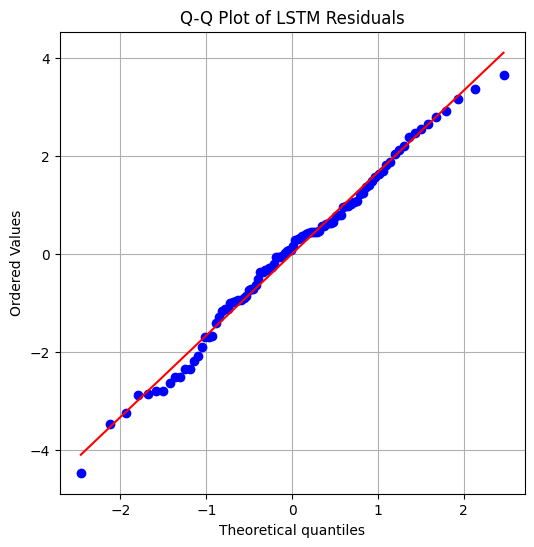

In [15]:
import scipy.stats as stats

residuals = df['Actual'] - df['LSTM']
plt.figure(figsize=(6, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of LSTM Residuals")
plt.grid(True)
plt.show()


In [6]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np

# Step 2: Simulate forecast data
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100),
    'Actual': np.linspace(150, 180, 100),
})
df['ARIMA'] = df['Actual'] + np.random.normal(0, 8, 100)
df['SARIMA'] = df['Actual'] + np.random.normal(0, 6, 100)
df['Prophet'] = df['Actual'] + np.random.normal(0, 4, 100)
df['LSTM'] = df['Actual'] + np.random.normal(0, 2, 100)

# Step 3: Export forecasted data
df.to_csv("forecasted_data.csv", index=False)

# Step 4: Create evaluation metrics DataFrame
results = pd.DataFrame({
    'Model': ['ARIMA', 'SARIMA', 'Prophet', 'LSTM'],
    'RMSE': [69.3731, 55.7803, 38.3167, 10.6288],
    'MAE': [63.3772, 51.0295, 31.3954, 8.8552],
    'R²': [-5.0340, -2.9011, -0.8408, 0.8448]
})

# Step 5: Export metrics
results.to_csv("metrics.csv", index=False)
